# 🚢 **Week 4 Project: Titanic Data Wrangling**

### *Scenario: Passenger Manifest Analysis*

**Role:** Data Scientist, *Historical Data Archives Ltd.*  
**Objective:** Clean and prepare the Titanic passenger manifest for analytics. Tackle missing values, messy text, and enrich the data for survival analysis.

---

#### **Datasets:**
- **`df_titanic`**: Raw passenger list (loaded from cloud)
- **`df_ports`**: Reference table for embarkation ports (created locally)

#### **Project Goals:**
1. Handle missing data (`Age`, `Cabin`, `Embarked`)
2. Clean and extract string features (`Name`, `Ticket`, `Title`)
3. Merge with port reference table
4. Reshape for survival and age/fare analysis
5. Document row counts after each step

---

In [ ]:
import pandas as pd
import numpy as np

# --- Load Titanic Data (Raw CSV from URL) ---
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_titanic = pd.read_csv(url)

# --- Create Reference Table for Ports ---
port_data = {
    'Embarked_Code': ['C', 'Q', 'S'],
    'Port_Name': ['Cherbourg', 'Queenstown', 'Southampton'],
    'Country': ['France', 'Ireland', 'England']
}
df_ports = pd.DataFrame(port_data)

print("✅ Data Loaded Successfully!")
print(f"Titanic Raw Rows: {len(df_titanic)}")
display(df_titanic.head())
display(df_ports)

✅ Data Loaded Successfully!
Titanic Raw Rows: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Embarked_Code,Port_Name,Country
0,C,Cherbourg,France
1,Q,Queenstown,Ireland
2,S,Southampton,England


## 🟢 Step 1: Handling Missing Data
**Reference:** *Ch. 7 – Filtering & Filling Missing Data*

The Titanic dataset contains missing values in several columns. Let's address them systematically:

**Tasks:**
1. **Identify** columns with missing values (`NaN`).
2. **Cabin:** Too many missing values—**drop** this column.
3. **Age:** Fill missing values with the **median** age.
4. **Embarked:** Drop rows with missing embarkation info.
5. **Checkpoint:** Print row count and check for remaining nulls.

---

In [ ]:
# Utility: Show missing value summary
def show_msno():
    print("Length of the DataFrame:", len(df_titanic))
    display(pd.DataFrame(columns=df_titanic.columns,
                        data=[df_titanic.isna().any().values, df_titanic.isna().sum()],
                        index=['NA','Count']).T)

In [243]:
show_msno()

Length of the DataFrame: 891


,NA,Count
PassengerId,False,0
Survived,False,0
Pclass,False,0
Name,False,0
Sex,False,0
Age,True,177
SibSp,False,0
Parch,False,0
Ticket,False,0
Fare,False,0


In [ ]:
# Fill missing Age values with the median
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())

In [245]:
show_msno()

Length of the DataFrame: 891


,NA,Count
PassengerId,False,0
Survived,False,0
Pclass,False,0
Name,False,0
Sex,False,0
Age,False,0
SibSp,False,0
Parch,False,0
Ticket,False,0
Fare,False,0


In [ ]:
# Drop rows where Embarked is missing
df_titanic = df_titanic.dropna(subset=['Embarked'])

In [247]:
show_msno()

Length of the DataFrame: 889


,NA,Count
PassengerId,False,0
Survived,False,0
Pclass,False,0
Name,False,0
Sex,False,0
Age,False,0
SibSp,False,0
Parch,False,0
Ticket,False,0
Fare,False,0


## 🟦 Step 2: String Manipulation (Cleaning Text)
**Reference:** *Ch. 7 – String Methods & RegEx*

The `Name` and `Ticket` columns are messy. Let's standardize and extract useful info:

**Tasks:**
1. **Normalize:** Convert `Name` to lowercase.
2. **Clean:** Strip whitespace from `Ticket`.
3. **Extract:** Create a new `Title` column (e.g., "mr", "mrs", "miss") from `Name`. (*Hint: use `.str.extract()`*)

---

In [248]:
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# Convert Name to lowercase and strip whitespace
df_titanic['Name'] = df_titanic['Name'].str.lower().str.strip()

In [ ]:
# Extract honorific Title from Name (e.g., mr, mrs, miss)
df_titanic['Title'] = df_titanic['Name'].str.extract(
    r'(?i)\b(mr|miss|mrs|master|don|rev|dr|mme|ms|major|lady|sir|mlle|capt|the countess|jonkheer|col)\.', expand=False
)

In [251]:
df_titanic.Title.isna().any()

np.False_

In [252]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,S,mr


## 🟨 Step 3: Merging DataFrames
**Reference:** *Ch. 8 – Database-Style Joins*

The `Embarked` column uses codes ('C', 'Q', 'S'). Let's enrich the data with full port names and countries from `df_ports`.

**Tasks:**
1. **Merge:** Left join `df_titanic` with `df_ports` to add `Port_Name` and `Country`.
2. **Verify:** Check that new columns exist and row count is unchanged.

---

In [ ]:
# Merge Titanic data with port reference table (left join)
df_merged = pd.merge(
    left=df_titanic,
    right=df_ports,
    how="left",
    left_on="Embarked",
    right_on="Embarked_Code"
)
print(f"""df_merged shape {df_merged.shape}
df_titanic shape: {df_titanic.shape}""")

df_merged shape (889, 16)
df_titanic shape: (889, 13)


In [254]:
display(df_merged.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Embarked_Code,Port_Name,Country
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr,S,Southampton,England
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs,C,Cherbourg,France
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss,S,Southampton,England
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs,S,Southampton,England
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,S,mr,S,Southampton,England


In [255]:
show_msno()

Length of the DataFrame: 889


,NA,Count
PassengerId,False,0
Survived,False,0
Pclass,False,0
Name,False,0
Sex,False,0
Age,False,0
SibSp,False,0
Parch,False,0
Ticket,False,0
Fare,False,0


## 🟪 Step 4: Reshaping Data (Pivot & Melt)
**Reference:** *Ch. 8 – Reshaping with Hierarchical Indexing*

The analytics team needs two views:

**View 1: Survival Rate Pivot Table**
- **Index:** `Sex`
- **Columns:** `Pclass`
- **Values:** `Survived` (mean)

**View 2: Long Format for Age & Fare**
- **ID Vars:** `PassengerId`, `Survived`
- **Value Vars:** `Age`, `Fare`
- **Variable Name:** `Measure_Type`
- **Value Name:** `Measure_Value`

---

In [ ]:
# Pivot table: Average survival rate by Sex and Pclass
df_merged.pivot_table(index="Sex", columns="Pclass", values="Survived", aggfunc="mean")

Pclass,1,2,3
Sex,,,
female,0.967391,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [257]:
df_merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Embarked_Code,Port_Name,Country
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr,S,Southampton,England
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs,C,Cherbourg,France
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss,S,Southampton,England
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs,S,Southampton,England
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,S,mr,S,Southampton,England


In [ ]:
# Melt Age and Fare into long format for histogram analysis
df_melted = pd.melt(
    df_titanic, 
    id_vars=['PassengerId', 'Survived'],    
    value_vars=['Age', 'Fare'],             
    var_name='Measure_Type',                
    value_name='Measure_Value'              
)

df_melted.head()

,PassengerId,Survived,Measure_Type,Measure_Value
0,1,0,Age,22.0
1,2,1,Age,38.0
2,3,1,Age,26.0
3,4,1,Age,35.0
4,5,0,Age,35.0


In [259]:
df_melted.head()

,PassengerId,Survived,Measure_Type,Measure_Value
0,1,0,Age,22.0
1,2,1,Age,38.0
2,3,1,Age,26.0
3,4,1,Age,35.0
4,5,0,Age,35.0


array([<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Fare'}>],
      dtype=object)

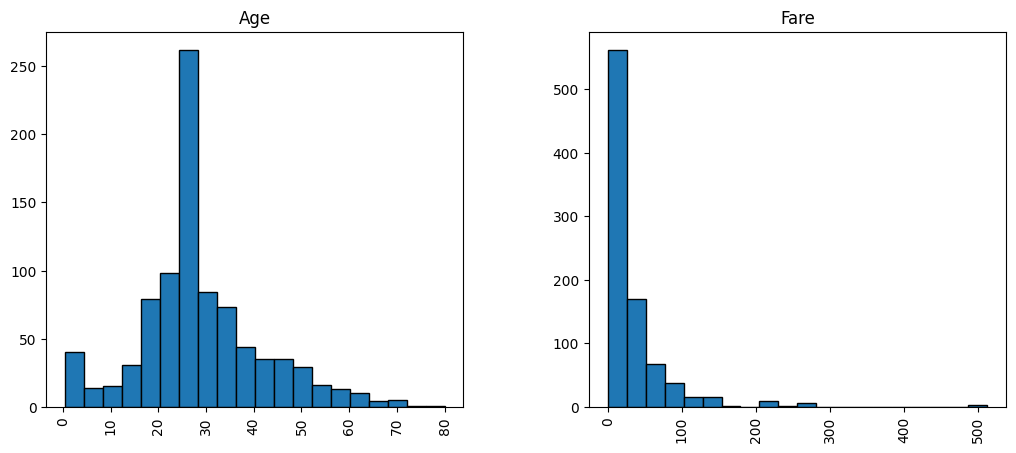

In [ ]:
# Plot histograms for Age and Fare (by Measure_Type)
df_melted.hist(
    column='Measure_Value', 
    by='Measure_Type', 
    bins=20, 
    figsize=(12, 5),
    layout=(1, 2),
    edgecolor='black'
)